In [1]:
G = groups.presentation.Symmetric(4)

In [66]:
G

Finitely presented group < a, b | b^2, a^4, (b*a^-1)^3 >

In [2]:
G.structure_description()

'S4'

In [3]:
# Optimization: Cache index of inverse
# Optimization: Only look at quandling by generators! Perhaps not...

enumed = list(enumerate(G))
#gens = list(G.gens())

rs = G.rewriting_system()
rs.make_confluent()

groupIndex = dict([(rs.reduce(g), i) for i, g in enumed])

def indexOf(g):
    g1 = rs.reduce(g)
    return groupIndex[g1]
    #for i, g1 in enumed:
        #if g == g1:
            #return i

def forOneG(t):
    (i, g) = t
    grelations = []
    
    indexInv = indexOf(g^(-1))
    
    for n in range(len(G)):
        gn = g^n
        if gn == g and n > 1:
            break
        indexN = indexOf(gn)
        grelations.append([indexInv + 1]*n + [indexN + 1])

    for i1, g1 in enumed:
        #i1 = indexOf(g1)
        indexInv1 = indexOf(g1^(-1))
        indexInv2 = indexOf((g1*g*g1^(-1))^(-1)) 
        grelations.append([i1 + 1, i + 1, indexInv1 + 1, indexInv2 + 1])

    return grelations

relations = []

#for i, g in enumed:
    #rel = forOneG(i, g)
    #relations.extend(rel)

from multiprocessing import Pool

pool = Pool(processes = 7)
result = pool.map(forOneG, enumed)
relations = [rel for rels in result for rel in rels]
pool.close()
pool.join()

In [4]:
FreeG = FreeGroup(len(G))

In [5]:
FG = FreeG / relations

In [6]:
FG

Finitely presented group < x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23 | x0, x0^2, x0^4, x1*x0*x2*x0, x2*x0*x1*x0, (x3*x0)^2, (x4*x0)^2, x5*x0*x8*x0, x6*x0*x7*x0, x7*x0*x6*x0, x8*x0*x5*x0, x9*x0*x14*x0, x10*x0*x13*x0, (x11*x0)^2, (x12*x0)^2, x13*x0*x10*x0, x14*x0*x9*x0, x15*x0*x18*x0, x16*x0*x17*x0, x17*x0*x16*x0, x18*x0*x15*x0, (x19*x0)^2, (x20*x0)^2, (x21*x0)^2, (x22*x0)^2, (x23*x0)^2, x0, x2*x1, x2^2*x4, x2^4, x2^4*x0, x0*x1*x0*x2, x1^2*x2^2, x2*x1^2*x2, x3*x1*x3*x10, x4*x1*x4*x2, x5*x1*x8*x9, x6*x1*x7*x14, x7*x1*x6*x10, x8*x1*x5*x10, x9*x1*x14*x13, x10*x1*x13*x9, x11*x1*x11*x9, x12*x1*x12*x14, x13*x1*x10*x14, x14*x1*x9*x10, x15*x1*x18*x13, x16*x1*x17*x13, x17*x1*x16*x9, x18*x1*x15*x14, (x19*x1)^2, x20*x1*x20*x13, (x21*x1)^2, (x22*x1)^2, (x23*x1)^2, x0, x1*x2, x1^2*x4, x1^4, x1^4*x0, x0*x2*x0*x1, x1*x2^2*x1, x2^2*x1^2, x3*x2*x3*x13, x4*x2*x4*x1, x5*x2*x8*x14, x6*x2*x7*x9, x7*x2*x6*x13, x8*x2*x5*x13, x9*x2*x14*x10, x10*

In [7]:
FG.simplified().structure_description()

'C2 x S4'

In [8]:
# Eta, takes index of element x in G and returns [x] in Gr Pq G
def ofi(i):
    return FG.gens()[i]

In [41]:
# Multiplies two elements of G by index and returns an index
def mul_gi(i, j):
    return indexOf(enumed[i][1] * enumed[j][1])

def inv_gi(i):
    return indexOf(enumed[i][1] ^ (-1))

def one_gi():
    return 0

def pow_gi(i, n):
    return indexOf(enumed[i][1] ^ n)

def rhd_gi(i, j):
    return mul_gi(i, mul_gi(j, inv_gi(i)))

In [9]:
def is_homo_locus(i, j):
    k = mul_gi(i, j)
    return ofi(i) * ofi(j) == ofi(k)

In [12]:
for i in range(24):
    print(is_homo_locus(i, i))

True
True
False
False
True
True
True
True
True
True
False
True
False
True
True
True
True
True
True
False
True
True
False


IndexError: list index out of range

In [13]:
def checkRefl():
    for i in range(len(G)):
        if not is_homo_locus(i, i):
            return False
    return True

In [14]:
checkRefl()

True

In [15]:
def checkSymm():
    for i in range(len(G)):
        for j in range(len(G)):
            if is_homo_locus(i, j) != is_homo_locus(j, i):
                return False
    return True

In [16]:
checkSymm()

True

In [21]:
def checkTrans():
    for i in range(len(G)):
        for j in range(len(G)):
            for k in range(len(G)):
                if is_homo_locus(i, j) and is_homo_locus(j, k) and not is_homo_locus(i, k):
                    print(i, j, k)
                    return False
    return True

In [22]:
checkTrans()

1 0 3


False

In [42]:
def checkInv():
    for i in range(len(G)):
        for j in range(len(G)):
            hij = is_homo_locus(i, j)
            hijinv = is_homo_locus(inv_gi(i), inv_gi(j))
            if hij != hijinv:
                return False
    return True

In [43]:
checkInv()

True

In [47]:
def checkOneInv():
    for i in range(len(G)):
        for j in range(len(G)):
            hij = is_homo_locus(i, j)
            hijinv = is_homo_locus(inv_gi(i), j)
            if hij != hijinv:
                print(i, j)
                return False
    return True

In [48]:
checkOneInv()

1 5


False

In [64]:
def checkPow():
    for i in range(len(G)):
        for j in range(len(G)):
            hij = is_homo_locus(i, j)
            for n in range(len(G)):
                hijn = is_homo_locus(pow_gi(i, n), pow_gi(j, n))
                if not (hijn or not hij): # a implies b is b or not a
                    print(i, j, n)
                    return False
    return True

In [65]:
checkPow()

1 5 5


False

In [67]:
enumed[1]

(1, a)

In [68]:
enumed[5]

(5, a*b)

In [70]:
enumed[pow_gi(1, 5)]

(1, a)

In [71]:
enumed[pow_gi(5, 5)]

(8, b*a^-1)

In [72]:
def checkPowComm():
    for i in range(len(G)):
        for j in range(len(G)):
            hij = is_homo_locus(i, j)
            if (mul_gi(i, j) != mul_gi(j, i)): # Check it does commute
                continue
            for n in range(len(G)):
                hijn = is_homo_locus(pow_gi(i, n), pow_gi(j, n))
                if not (hijn or not hij): # a implies b is b or not a
                    print(i, j, n)
                    return False
    return True

In [73]:
checkPowComm()

True

In [74]:
def checkCommImplies():
    for i in range(len(G)):
        for j in range(len(G)):
            if (mul_gi(i, j) != mul_gi(j, i)): # Check it does commute
                continue
            hij = is_homo_locus(i, j)
            if not hij:
                return False
    return True

In [75]:
checkCommImplies()

True

In [ ]:
# Interesting!

In [78]:
def checkImpliesComm():
    for i in range(len(G)):
        for j in range(len(G)):
            hij = is_homo_locus(i, j)
            if not hij:
                continue
            if (mul_gi(i, j) != mul_gi(j, i)): # Check it does commute
                print(i, j)
                return False
    return True

In [79]:
checkImpliesComm()

1 5


False

In [ ]:
# Not in the other direction

In [82]:
def checkMul():
    for i1 in range(len(G)):
        for i2 in range(len(G)):
            if not is_homo_locus(i1, i2):
                continue
            for j1 in range(len(G)):
                for j2 in range(len(G)):
                    if not is_homo_locus(j1, j2):
                        continue
                    if not is_homo_locus(mul_gi(i1, j1), mul_gi(i2, j2)):
                        print(i1, j1, i2, j2)
                        return False
    return True

In [83]:
checkMul()

0 1 1 9


False

In [ ]:
# Actually obvious, as (1, a) * (b, 1) would always give (a, b)

In [84]:
def checkRhd():
    for i1 in range(len(G)):
        for i2 in range(len(G)):
            if not is_homo_locus(i1, i2):
                continue
            for j1 in range(len(G)):
                for j2 in range(len(G)):
                    if not is_homo_locus(j1, j2):
                        continue
                    if not is_homo_locus(rhd_gi(i1, j1), rhd_gi(i2, j2)):
                        print(i1, j1, i2, j2)
                        return False
    return True

In [85]:
checkRhd()

0 3 1 15


False

In [ ]:
# We see that (1, a) rhd (b, c) would give (b, a rhd c), closing property on conjugacy classes, which it is not

In [26]:
def generateNegativeGraph():
    graphObj = {}
    for i in range(len(G)):
        adj = []
        for j in range(len(G)):
            if not is_homo_locus(i, j):
                adj.append(j)
        graphObj[i] = adj
    return Graph(graphObj)

In [29]:
Gr = generateNegativeGraph()

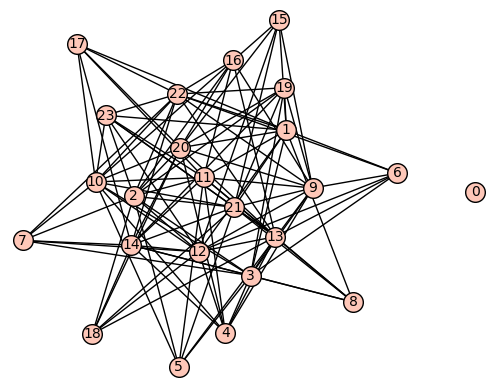

In [30]:
Gr.plot()

In [37]:
print(Gr.complement().adjacency_matrix().eigenvalues())

[5, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -3, -3, -3, -3, -3, -3, -3, -3, -1.957205920740940?, 2.177970902211113?, 14.77923501852983?]


In [40]:
Gr.order(), Gr.size(), Gr.complement().size()

(24, 108, 168)